In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# from modules.lane_detection import *
from modules.preprocessing import *
from modules.region_of_interest import *
from modules.line_finding import *
from modules.postprocessing import postprocess
from modules.line_finding import *
from modules.lane_metrics import *

In [94]:
video_reader = cv.VideoCapture("Data/Challenge Video.mp4")
for i in range(int(3 * video_reader.get(cv.CAP_PROP_FPS))):
    video_reader.read()

In [116]:
for i in range(int(0.5 * video_reader.get(cv.CAP_PROP_FPS))):
    video_reader.read()

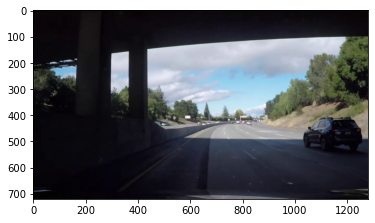

In [191]:
image = video_reader.read()[1]

# image = cv.imread("Data\Images\Test 1.jpg")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [235]:
def detect_lanes(image):
    
    h, s, v = cv.split(image)
    white_s_thresholded = cv.adaptiveThreshold(s, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 31, 2)
    white_v_thresholded = cv.adaptiveThreshold(v, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 31, -2)
    yellow_h_thresholded = cv.bitwise_and(cv.threshold(h, 10, 255, cv.THRESH_BINARY)[1], cv.threshold(h, 50, 255, cv.THRESH_BINARY_INV)[1])
    _, yellow_s_thresholded = cv.threshold(s, 50, 255, cv.THRESH_BINARY)
    _, yellow_v_thresholded = cv.threshold(s, 50, 255, cv.THRESH_BINARY)
    white_mask = cv.bitwise_and(white_s_thresholded, white_v_thresholded)
    yellow_mask = cv.bitwise_and(cv.bitwise_and(yellow_h_thresholded, yellow_s_thresholded), yellow_v_thresholded)
    plt.imshow(white_mask, cmap = "gray")
    lane_mask = cv.bitwise_or(white_mask, yellow_mask)
    # lane_mask[0:100, :] = 0
    # lane_mask[400:500, :] = 0
    return lane_mask

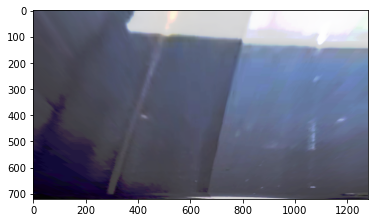

In [213]:
warped_image, _ = perspective_transform(image)
equalized_image = cv.cvtColor(preprocess(warped_image), cv.COLOR_BGR2HSV)

plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_HSV2RGB))

In [ ]:
image[]

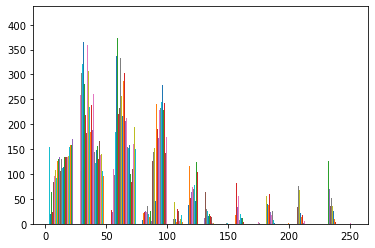

In [201]:
plt.hist(equalized_image[:, :, 1]);

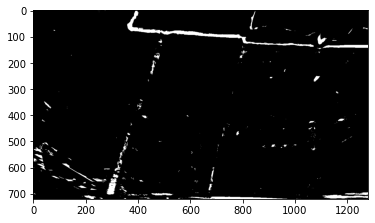

In [236]:
detect_lanes(equalized_image);

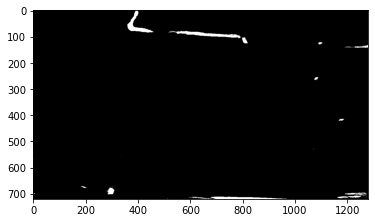

In [214]:
plt.imshow(detect_lanes(equalized_image), cmap = "gray");

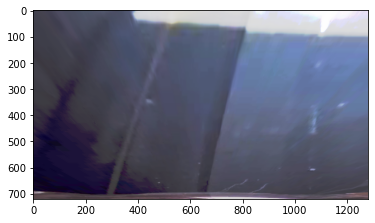

In [162]:
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_HSV2RGB))

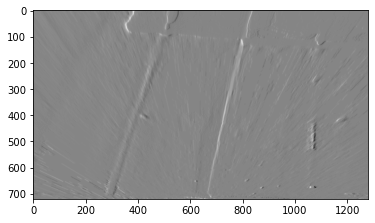

In [243]:
plt.imshow(cv.Sobel(equalized_image[:, :, 2], cv.CV_64F, 1, 0, ksize=5), cmap = "gray")

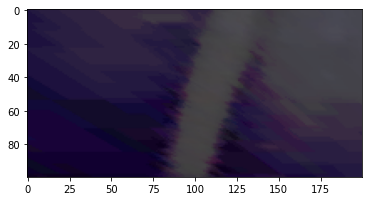

In [215]:
cropped = equalized_image[600:700, 200:400]
plt.imshow(cv.cvtColor(cropped, cv.COLOR_HSV2RGB))

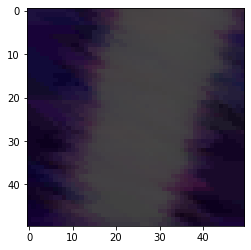

In [216]:
cropped = cropped[50:100, 75:125]
plt.imshow(cv.cvtColor(cropped, cv.COLOR_HSV2RGB))

In [217]:
cropped[:, :, 2].mean()

59.392

In [218]:
cropped[:, :, 1].mean()

96.7824

In [219]:
cropped[20, 30]

array([150,   4,  70], dtype=uint8)

In [156]:
ref_image = cv.imread("Data\Images\Test 1.jpg")

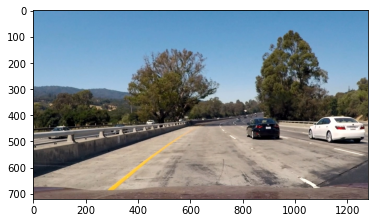

In [158]:
plt.imshow(cv.cvtColor(ref_image, cv.COLOR_BGR2RGB))

In [163]:
warped_image, _ = perspective_transform(ref_image)
equalized_image = cv.cvtColor(preprocess(warped_image), cv.COLOR_BGR2HSV)


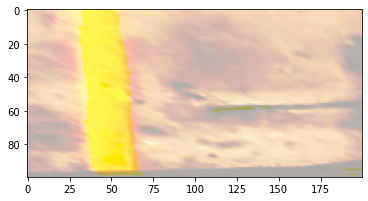

In [164]:
cropped = equalized_image[600:700, 200:400]
plt.imshow(cv.cvtColor(cropped, cv.COLOR_HSV2RGB))

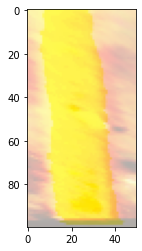

In [165]:
cropped = cropped[:, 25:75]
plt.imshow(cv.cvtColor(cropped, cv.COLOR_HSV2RGB))

In [167]:
cropped[60, 20]

array([ 28, 178, 255], dtype=uint8)

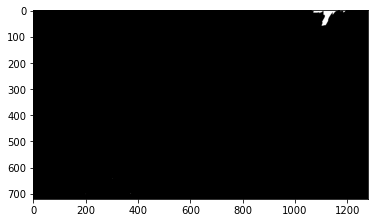

In [124]:
plt.imshow(detect_lanes(equalized_image), cmap = "gray")

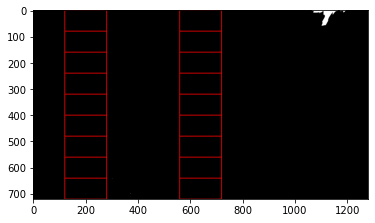

In [125]:
left_fitx, right_fitx, ploty, out_img = fit_polynomial(detect_lanes(equalized_image))
plt.imshow(out_img, cmap = "gray")

In [23]:
def process_frame(image):

    equalized_image = cv.cvtColor(preprocess(image), cv.COLOR_BGR2HSV)
    warped_image, Minv = perspective_transform(equalized_image)
    binary_warped = detect_lanes(warped_image)
    
    left_x, right_x, ploty, _ = fit_polynomial(binary_warped)
    
    left_curvature, right_curvature = measure_curvature(binary_warped)
    center = get_center_distance(binary_warped)
    
    drawn_img = draw_lane(image,binary_warped, left_x, right_x, ploty,Minv)
    drawn_img_with_values = draw_values(drawn_img,left_curvature,right_curvature, center)
    
    return drawn_img_with_values, warped_image, binary_warped

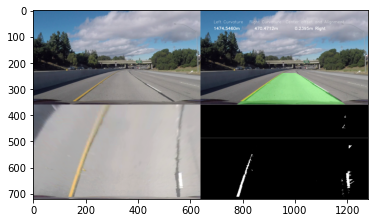

In [24]:
processed_frame, warped_frame, binary_warped_frame = process_frame(image)
debug_frame_upper = np.concatenate((cv.resize(image, (640, 360)), cv.resize(processed_frame, (640, 360))), axis = 1)
binary_warped_frame[binary_warped_frame] = 255
debug_frame_lower = np.concatenate((cv.cvtColor(cv.resize(warped_frame, (640, 360)), cv.COLOR_HSV2BGR), 
                                    cv.cvtColor(cv.resize(binary_warped_frame, (640, 360)), cv.COLOR_GRAY2BGR)), 
                                    axis = 1)
debug_frame = np.concatenate((debug_frame_upper, debug_frame_lower), axis = 0)

plt.imshow(cv.cvtColor(debug_frame, cv.COLOR_BGR2RGB))